In [2]:
import pandas as pd

In [3]:
# read
df = pd.read_excel('./output/korelasi-tiap-soal.xlsx')
df.head(3)

,soal,pos,version-soal,current-prob,num_verbs,num_conj,corr-verbs,corr-conj
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.20,1,3,0.20,0.60
1,"Dalam studi biologi, penggunaan mikroskop dipe...","Dalam/NSD studi/NSD biologi/NSD ,/Z-- pengguna...",001v002,0.73,2,2,1.46,1.46
2,Ilmu biologi yang membutuhkan penggunaan mikro...,Ilmu/NSD biologi/NSD yang/S-- membutuhkan/VSA ...,001v003,0.13,2,3,0.26,0.39


In [6]:
# hitung kata tiap soal
df["jumlah-kata"] = df["soal"].apply(lambda x: len(str(x).split()))
df.head(6)

,soal,pos,version-soal,current-prob,num_verbs,num_conj,corr-verbs,corr-conj,jumlah-kata
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.20,1,3,0.20,0.60,10
1,"Dalam studi biologi, penggunaan mikroskop dipe...","Dalam/NSD studi/NSD biologi/NSD ,/Z-- pengguna...",001v002,0.73,2,2,1.46,1.46,10
2,Ilmu biologi yang membutuhkan penggunaan mikro...,Ilmu/NSD biologi/NSD yang/S-- membutuhkan/VSA ...,001v003,0.13,2,3,0.26,0.39,10
3,Cabang biologi yang mendorong peneliti untuk m...,Cabang/NSD biologi/NSD yang/S-- mendorong/VSA ...,002v001,0.65,2,3,1.30,1.95,12
4,Cabang ilmu biologi yang menjadi dasar bagi pe...,Cabang/NSD ilmu/NSD biologi/NSD yang/S-- menja...,002v002,0.67,2,3,1.34,2.01,15
5,Bidang biologi yang mendasari upaya para penel...,Bidang/NSD biologi/NSD yang/S-- mendasari/VSA ...,002v003,0.85,3,2,2.55,1.70,17


In [7]:
correlation_words = df[['current-prob', 'jumlah-kata']].corr().iloc[0, 1]
print(f"Korelasi antara jumlah kata dalam soal dan probabilitas keberhasilan menjawab: {correlation_words}")


Korelasi antara jumlah kata dalam soal dan probabilitas keberhasilan menjawab: -0.02312401322807099


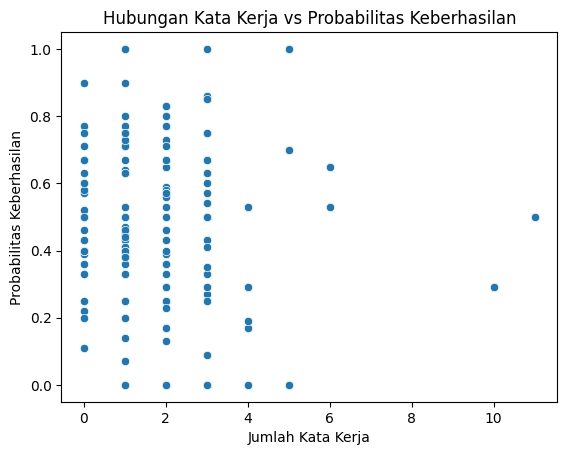

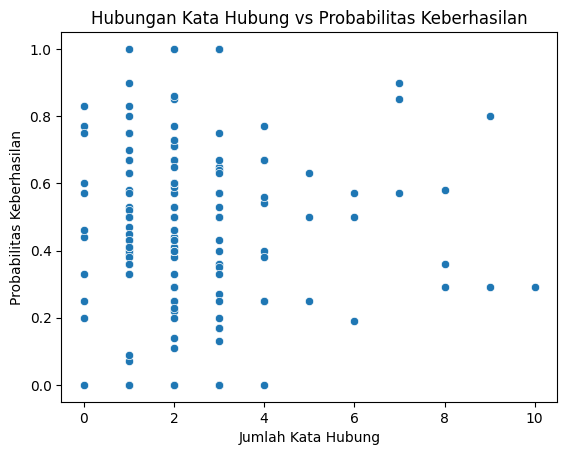

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot untuk kata kerja vs probabilitas keberhasilan
sns.scatterplot(x=df["num_verbs"], y=df["current-prob"])
plt.title("Hubungan Kata Kerja vs Probabilitas Keberhasilan")
plt.xlabel("Jumlah Kata Kerja")
plt.ylabel("Probabilitas Keberhasilan")
plt.show()

# Scatter plot untuk kata hubung vs probabilitas keberhasilan
sns.scatterplot(x=df["num_conj"], y=df["current-prob"])
plt.title("Hubungan Kata Hubung vs Probabilitas Keberhasilan")
plt.xlabel("Jumlah Kata Hubung")
plt.ylabel("Probabilitas Keberhasilan")
plt.show()


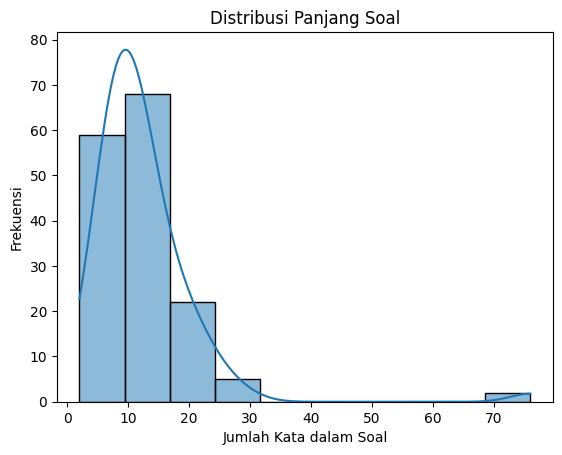

In [9]:
sns.histplot(df["jumlah-kata"], bins=10, kde=True)
plt.title("Distribusi Panjang Soal")
plt.xlabel("Jumlah Kata dalam Soal")
plt.ylabel("Frekuensi")
plt.show()


In [10]:
from scipy.stats import zscore

df["z_corr_verbs"] = zscore(df["corr-verbs"])
df["z_corr_conj"] = zscore(df["corr-conj"])
df.to_excel("hasil_normalisasi_korelasi.xlsx", index=False)

print("Hasil normalisasi disimpan dalam file: hasil_normalisasi_korelasi.xlsx")


Hasil normalisasi disimpan dalam file: hasil_normalisasi_korelasi.xlsx


In [11]:
df = pd.read_excel('hasil_normalisasi_korelasi.xlsx')
df.head(3)

,soal,pos,version-soal,current-prob,num_verbs,num_conj,corr-verbs,corr-conj,jumlah-kata,z_corr_verbs,z_corr_conj
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.20,1,3,0.20,0.60,10,-0.685258,-0.469347
1,"Dalam studi biologi, penggunaan mikroskop dipe...","Dalam/NSD studi/NSD biologi/NSD ,/Z-- pengguna...",001v002,0.73,2,2,1.46,1.46,10,0.674466,0.278309
2,Ilmu biologi yang membutuhkan penggunaan mikro...,Ilmu/NSD biologi/NSD yang/S-- membutuhkan/VSA ...,001v003,0.13,2,3,0.26,0.39,10,-0.620509,-0.651914


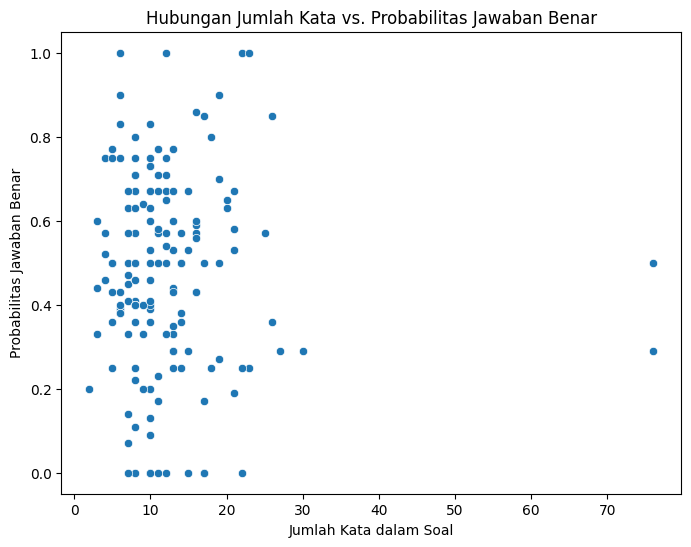

In [12]:
# Visualisasi scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='jumlah-kata', y='current-prob')
plt.title('Hubungan Jumlah Kata vs. Probabilitas Jawaban Benar')
plt.xlabel('Jumlah Kata dalam Soal')
plt.ylabel('Probabilitas Jawaban Benar')
plt.show()


Koefisien: -0.0006002610677802093, Intercept: 0.48456862620698893


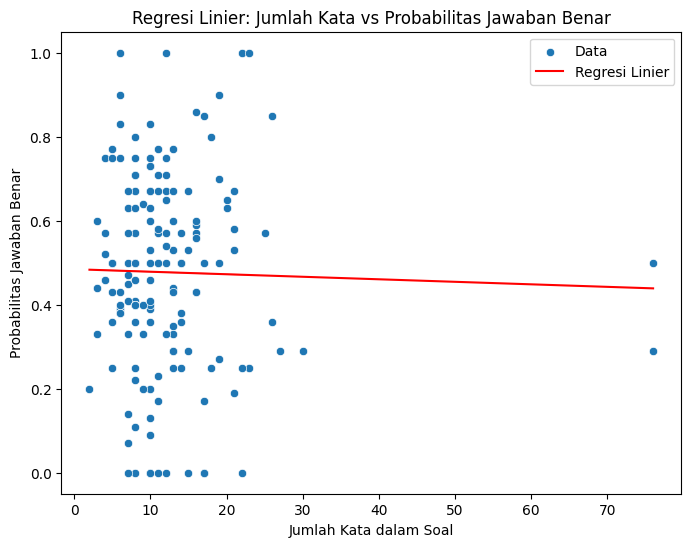

In [13]:
from sklearn.linear_model import LinearRegression

# Menyusun data
X = df[['jumlah-kata']]
y = df['current-prob']

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Menampilkan koefisien dan intercept
print(f'Koefisien: {model.coef_[0]}, Intercept: {model.intercept_}')

# Prediksi menggunakan model
df['pred_prob'] = model.predict(X)

# Visualisasi regresi linier
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='jumlah-kata', y='current-prob', label='Data')
sns.lineplot(data=df, x='jumlah-kata', y='pred_prob', color='red', label='Regresi Linier')
plt.title('Regresi Linier: Jumlah Kata vs Probabilitas Jawaban Benar')
plt.xlabel('Jumlah Kata dalam Soal')
plt.ylabel('Probabilitas Jawaban Benar')
plt.show()


In [14]:
# Menghitung korelasi
correlation_verbs = df[['current-prob', 'num_verbs']].corr().iloc[0, 1]
correlation_conj = df[['current-prob', 'num_conj']].corr().iloc[0, 1]
correlation_corr_verbs = df[['current-prob', 'corr-verbs']].corr().iloc[0, 1]
correlation_corr_conj = df[['current-prob', 'corr-conj']].corr().iloc[0, 1]

# Menampilkan hasil korelasi
print(f"Korelasi antara jumlah kata kerja dan probabilitas keberhasilan menjawab: {correlation_verbs}")
print(f"Korelasi antara jumlah kata hubung dan probabilitas keberhasilan menjawab: {correlation_conj}")
print(f"Korelasi antara korelasi kata kerja dan probabilitas keberhasilan menjawab: {correlation_corr_verbs}")
print(f"Korelasi antara korelasi kata hubung dan probabilitas keberhasilan menjawab: {correlation_corr_conj}")


Korelasi antara jumlah kata kerja dan probabilitas keberhasilan menjawab: -0.040107441283013794
Korelasi antara jumlah kata hubung dan probabilitas keberhasilan menjawab: -0.022891550820689985
Korelasi antara korelasi kata kerja dan probabilitas keberhasilan menjawab: 0.46958470744175346
Korelasi antara korelasi kata hubung dan probabilitas keberhasilan menjawab: 0.4783155703293981


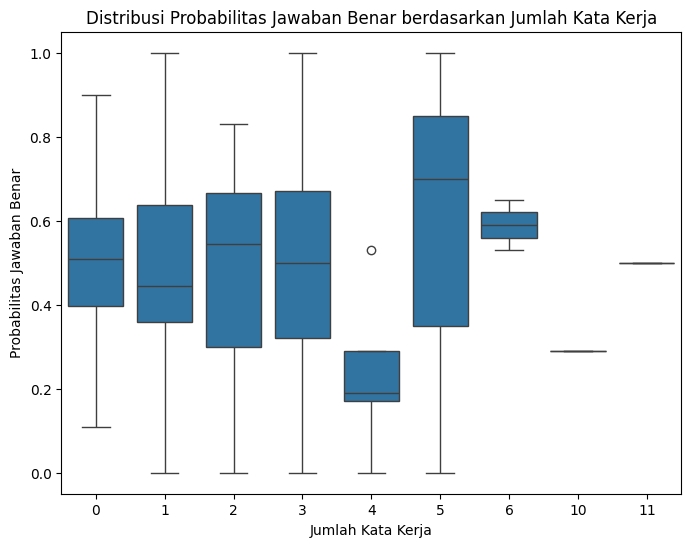

In [15]:
# Visualisasi distribusi probabilitas berdasarkan jumlah kata kerja
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='num_verbs', y='current-prob')
plt.title('Distribusi Probabilitas Jawaban Benar berdasarkan Jumlah Kata Kerja')
plt.xlabel('Jumlah Kata Kerja')
plt.ylabel('Probabilitas Jawaban Benar')
plt.show()


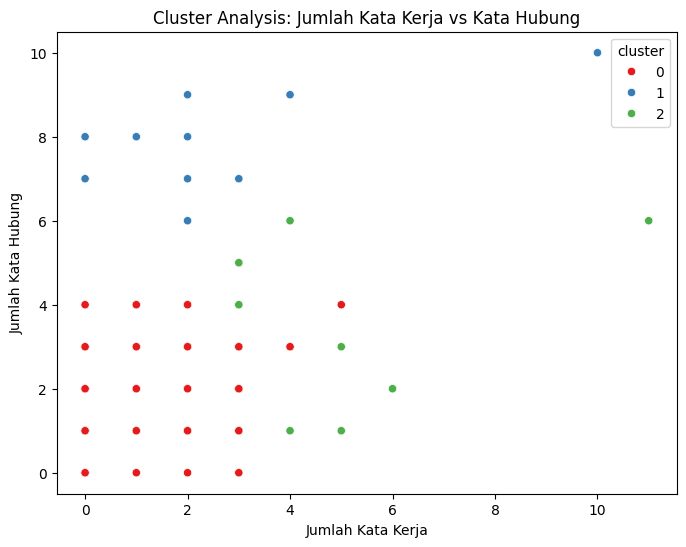

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Menyiapkan fitur yang akan digunakan untuk clustering
features = df[['num_verbs', 'num_conj', 'corr-verbs', 'corr-conj']]

# Normalisasi data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Menerapkan K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(normalized_features)

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='num_verbs', y='num_conj', hue='cluster', palette='Set1')
plt.title('Cluster Analysis: Jumlah Kata Kerja vs Kata Hubung')
plt.xlabel('Jumlah Kata Kerja')
plt.ylabel('Jumlah Kata Hubung')
plt.show()


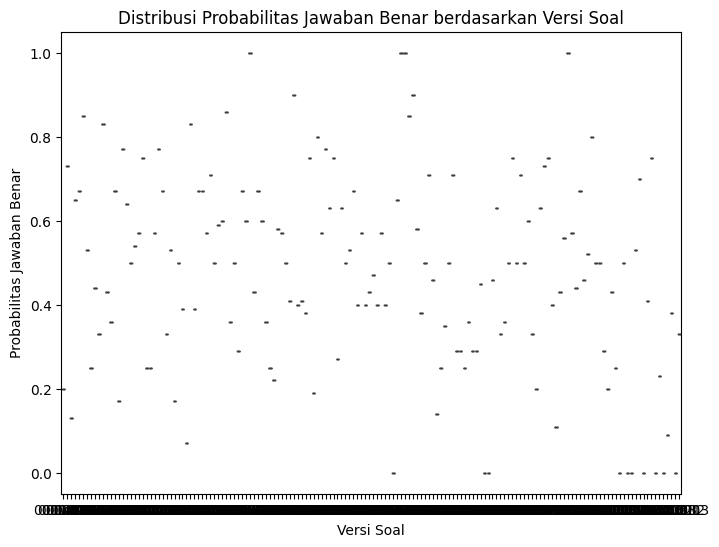

In [17]:
# Visualisasi distribusi probabilitas berdasarkan versi soal
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='version-soal', y='current-prob')
plt.title('Distribusi Probabilitas Jawaban Benar berdasarkan Versi Soal')
plt.xlabel('Versi Soal')
plt.ylabel('Probabilitas Jawaban Benar')
plt.show()


In [18]:
# Statistik deskriptif per versi soal
version_stats = df.groupby('version-soal')['current-prob'].describe()
print(version_stats)


              count  mean  std   min   25%   50%   75%   max
version-soal                                                
001v001         1.0  0.20  NaN  0.20  0.20  0.20  0.20  0.20
001v002         1.0  0.73  NaN  0.73  0.73  0.73  0.73  0.73
001v003         1.0  0.13  NaN  0.13  0.13  0.13  0.13  0.13
002v001         1.0  0.65  NaN  0.65  0.65  0.65  0.65  0.65
002v002         1.0  0.67  NaN  0.67  0.67  0.67  0.67  0.67
...             ...   ...  ...   ...   ...   ...   ...   ...
115v002         1.0  0.00  NaN  0.00  0.00  0.00  0.00  0.00
115v003         1.0  0.09  NaN  0.09  0.09  0.09  0.09  0.09
116v001         1.0  0.38  NaN  0.38  0.38  0.38  0.38  0.38
116v002         1.0  0.00  NaN  0.00  0.00  0.00  0.00  0.00
116v003         1.0  0.33  NaN  0.33  0.33  0.33  0.33  0.33

[156 rows x 8 columns]
